In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
def codeToReadTxtFile1(filename):

    epoch_num = 0
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0
    outer_dictionary = {}
    dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):

            line = lines[i].split()
            if (i%2 == 0):
                dictionary = {}

                epoch_num = int(line[1].split('/')[0])
                accuracy = float(line[7].split('%')[0])
                dictionary['train_accuracy'] = accuracy
                precision = float(line[10].split(',')[0])
                dictionary['train_precision'] = precision
                recall = float(line[13].split(',')[0])
                dictionary['train_recall'] = recall
                f1 = float(line[16])
                dictionary['train_f1'] = f1
                # print(epoch_num, accuracy, precision, recall, f1)

            else:
                
                accuracy = float(line[5].split('%')[0])
                dictionary['val_accuracy'] = accuracy
                precision = float(line[8].split(',')[0])
                dictionary['val_precision'] = precision
                recall = float(line[11].split(',')[0])
                dictionary['val_recall'] = recall
                f1 = float(line[14])
                dictionary['val_f1'] = f1

                outer_dictionary[epoch_num] = dictionary
    
    return outer_dictionary

In [9]:
def codeToReadTxtFile(filename):
    outer_dictionary = {}
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):  # Step 2 to process every other line
            epoch_num = int(lines[i].split('/')[0].split()[-1])
            train_accuracy = float(lines[i].split()[-1][:-1])
            val_accuracy = float(lines[i + 1].split()[-1][:-1])

            outer_dictionary[epoch_num] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}
    return outer_dictionary


In [27]:
def codeToPlot1(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [29]:
def codeToPlot(df, column1, column2, path):

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column1], label=column1, marker='o', color='blue')
    plt.plot(df.index, df[column2], label=column2, marker='o', color='green')

    # Add titles and labels
    plt.title(f'Line Chart of {column1} and {column2}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.ylim(10, 28)
    # Add a legend
    plt.legend()

    plt.savefig(path)
    # Show the plot
    plt.show()

In [32]:
df = pd.DataFrame.from_dict(codeToReadTxtFile("WithoutCOTRM.txt"), orient='index')
df

,train_accuracy,val_accuracy
1,13.125000,18.750000
2,15.937500,18.125000
3,18.333333,19.687500
4,18.541667,23.229167
5,22.916667,20.208333
6,20.416667,20.104167
7,19.479167,19.062500
8,21.666667,20.312500
9,21.458333,23.958333
10,20.416667,22.291667


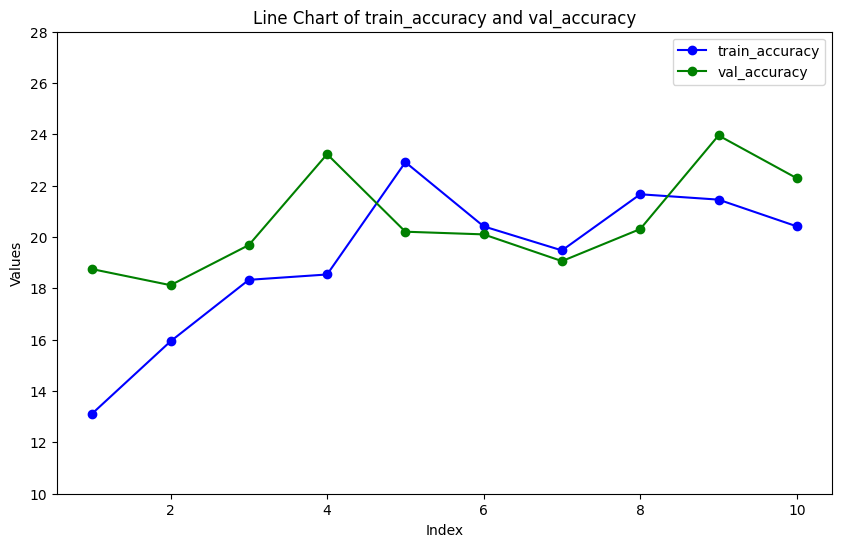

In [33]:
codeToPlot(df, 'train_accuracy', 'val_accuracy', 'accuracy_plot_WithoutCOTRM.png')